#### Plot SST using Delauney Triangulation
- global
- Hawaii

Ming Ge Dec. 2024

In [1]:
%matplotlib inline
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.tri as tri
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import sys
 
#sys.path.append("/glade/work/mingge/MPAS-Analysis/notebook-gallery")

#### Read data from MPAS grid as xarray

In [2]:
dir_d = '/glade/derecho/scratch/mingge/MPAS-Model/1993/'
flnm = dir_d + 'x4.163842.sfc_update.nc'
ds_i = xr.open_dataset(flnm)
sst = ds_i.sst.mean(dim=['Time'])
xice = ds_i.xice.mean(dim=['Time'])

#### Read MPAS grid/cell 

In [3]:
# get latCell, lonCell
flnm_ini = dir_d + 'x4.163842.grid_hawaii.nc'
ds_i = xr.open_dataset(flnm_ini)
ds_i = ds_i.squeeze()

# Convert to degrees from radians¶
lonData = np.degrees(ds_i.lonCell)
latData = np.degrees(ds_i.latCell)

# convert lonData to range [-180, 180]
lonData = ((lonData + 180) % 360) - 180

triang = tri.Triangulation(lonData, latData)

##### Global SST

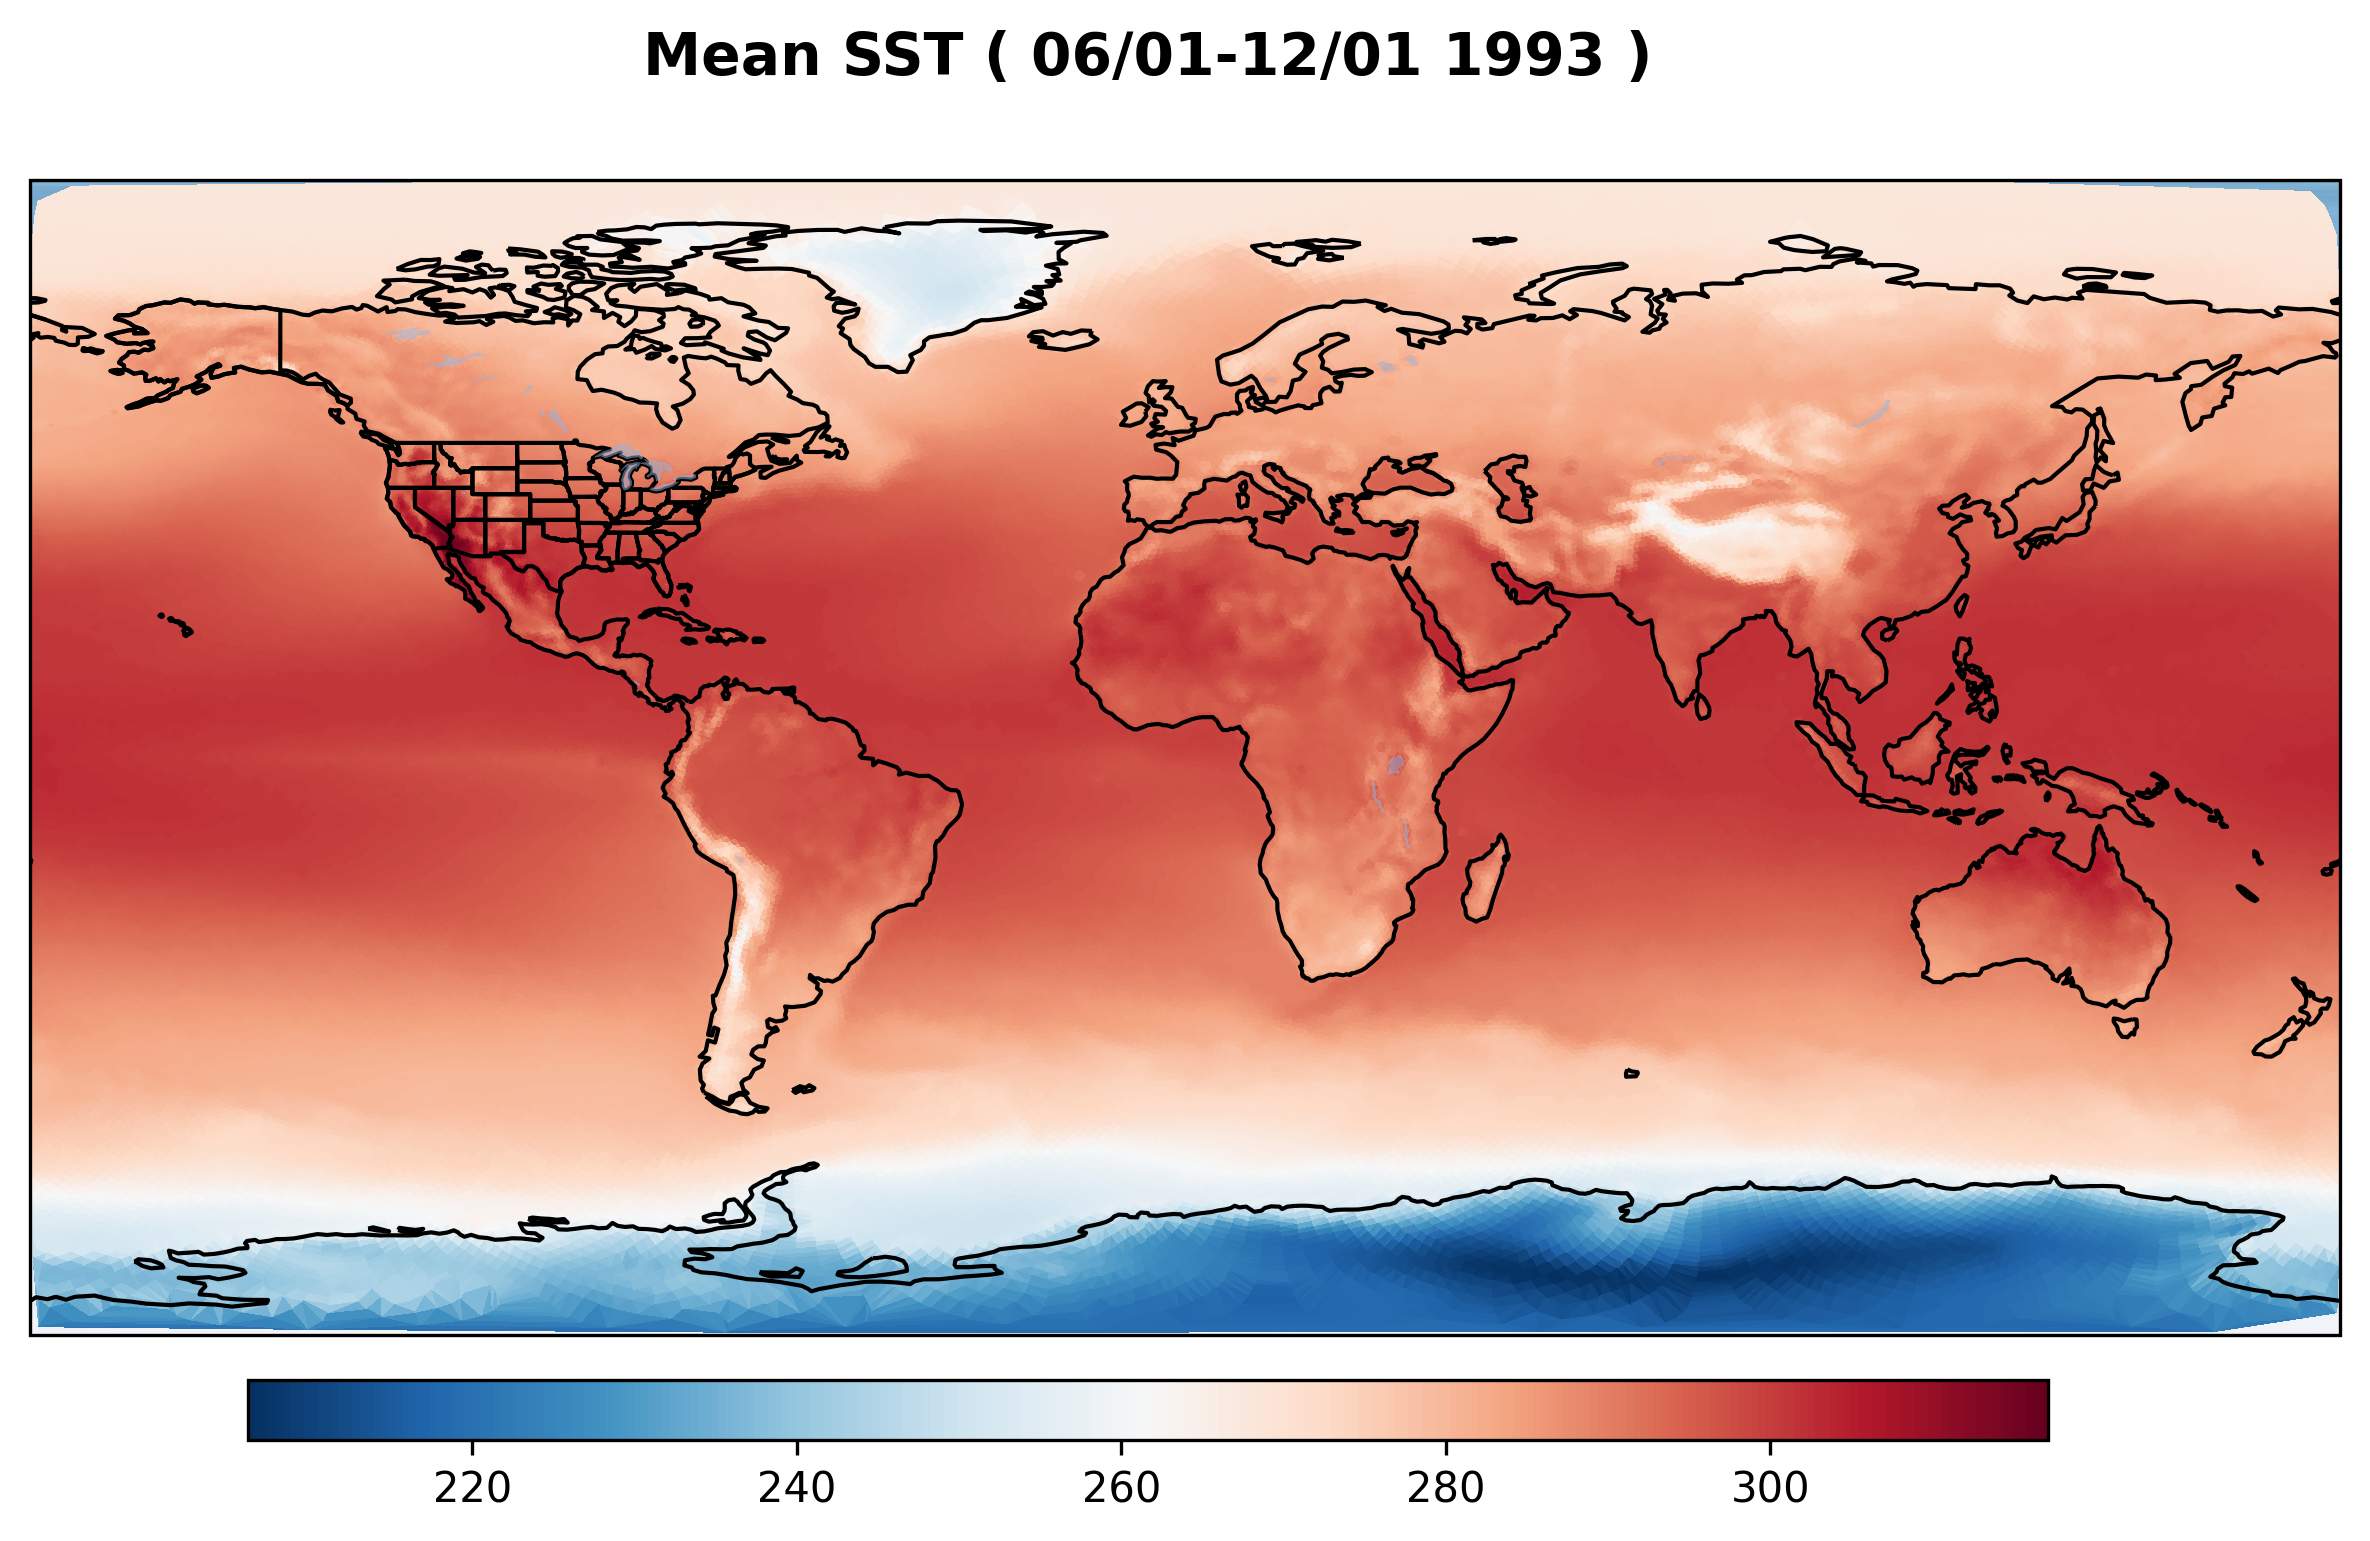

In [4]:
# by setting the central meridian to 180°, there is a gap in polar region
#fig, ax = plt.subplots(figsize=(10, 5), subplot_kw={'projection': ccrs.PlateCarree(central_longitude=180)}, dpi=300)
fig, ax = plt.subplots(figsize=(10, 5), subplot_kw={'projection': ccrs.PlateCarree()}, dpi=300)

# ax.set_global or plot_ax.set_extent
#ax.set_extent([np.min(lon), np.max(lon), np.min(lat), np.max(lat)], crs=ccrs.PlateCarree())
#ax.set_extent([-40, 40, -30, 30], crs=ccrs.PlateCarree())
ax.set_global

# adding geographic or other background images in visualizations.
ax.stock_img()

# Choose resolution of map features.
# Note that these features are downloaded when plotting for the first time, and for the entire globe,
#  so requesting high resolution can take several minutes.
scale = '110m' # '50m' # '10m'

ax.add_feature(cfeature.LAND.with_scale(scale))
ax.add_feature(cfeature.OCEAN.with_scale(scale))
ax.add_feature(cfeature.STATES.with_scale(scale))
ax.add_feature(cfeature.LAKES.with_scale(scale), alpha=0.5)
ax.add_feature(cfeature.COASTLINE.with_scale(scale))

mm = ax.tripcolor(triang, sst, edgecolors='none', 
                  transform=ccrs.PlateCarree(),
                  cmap = 'RdBu_r')
 
# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.04, 0.6, 0.04])

# Draw the colorbar
cbar=fig.colorbar(mm, cax=cbar_ax,orientation='horizontal')

plt.suptitle('Mean SST ( 06/01-12/01 1993 )', fontweight="bold", fontsize=14);

##### SST near Hawaii

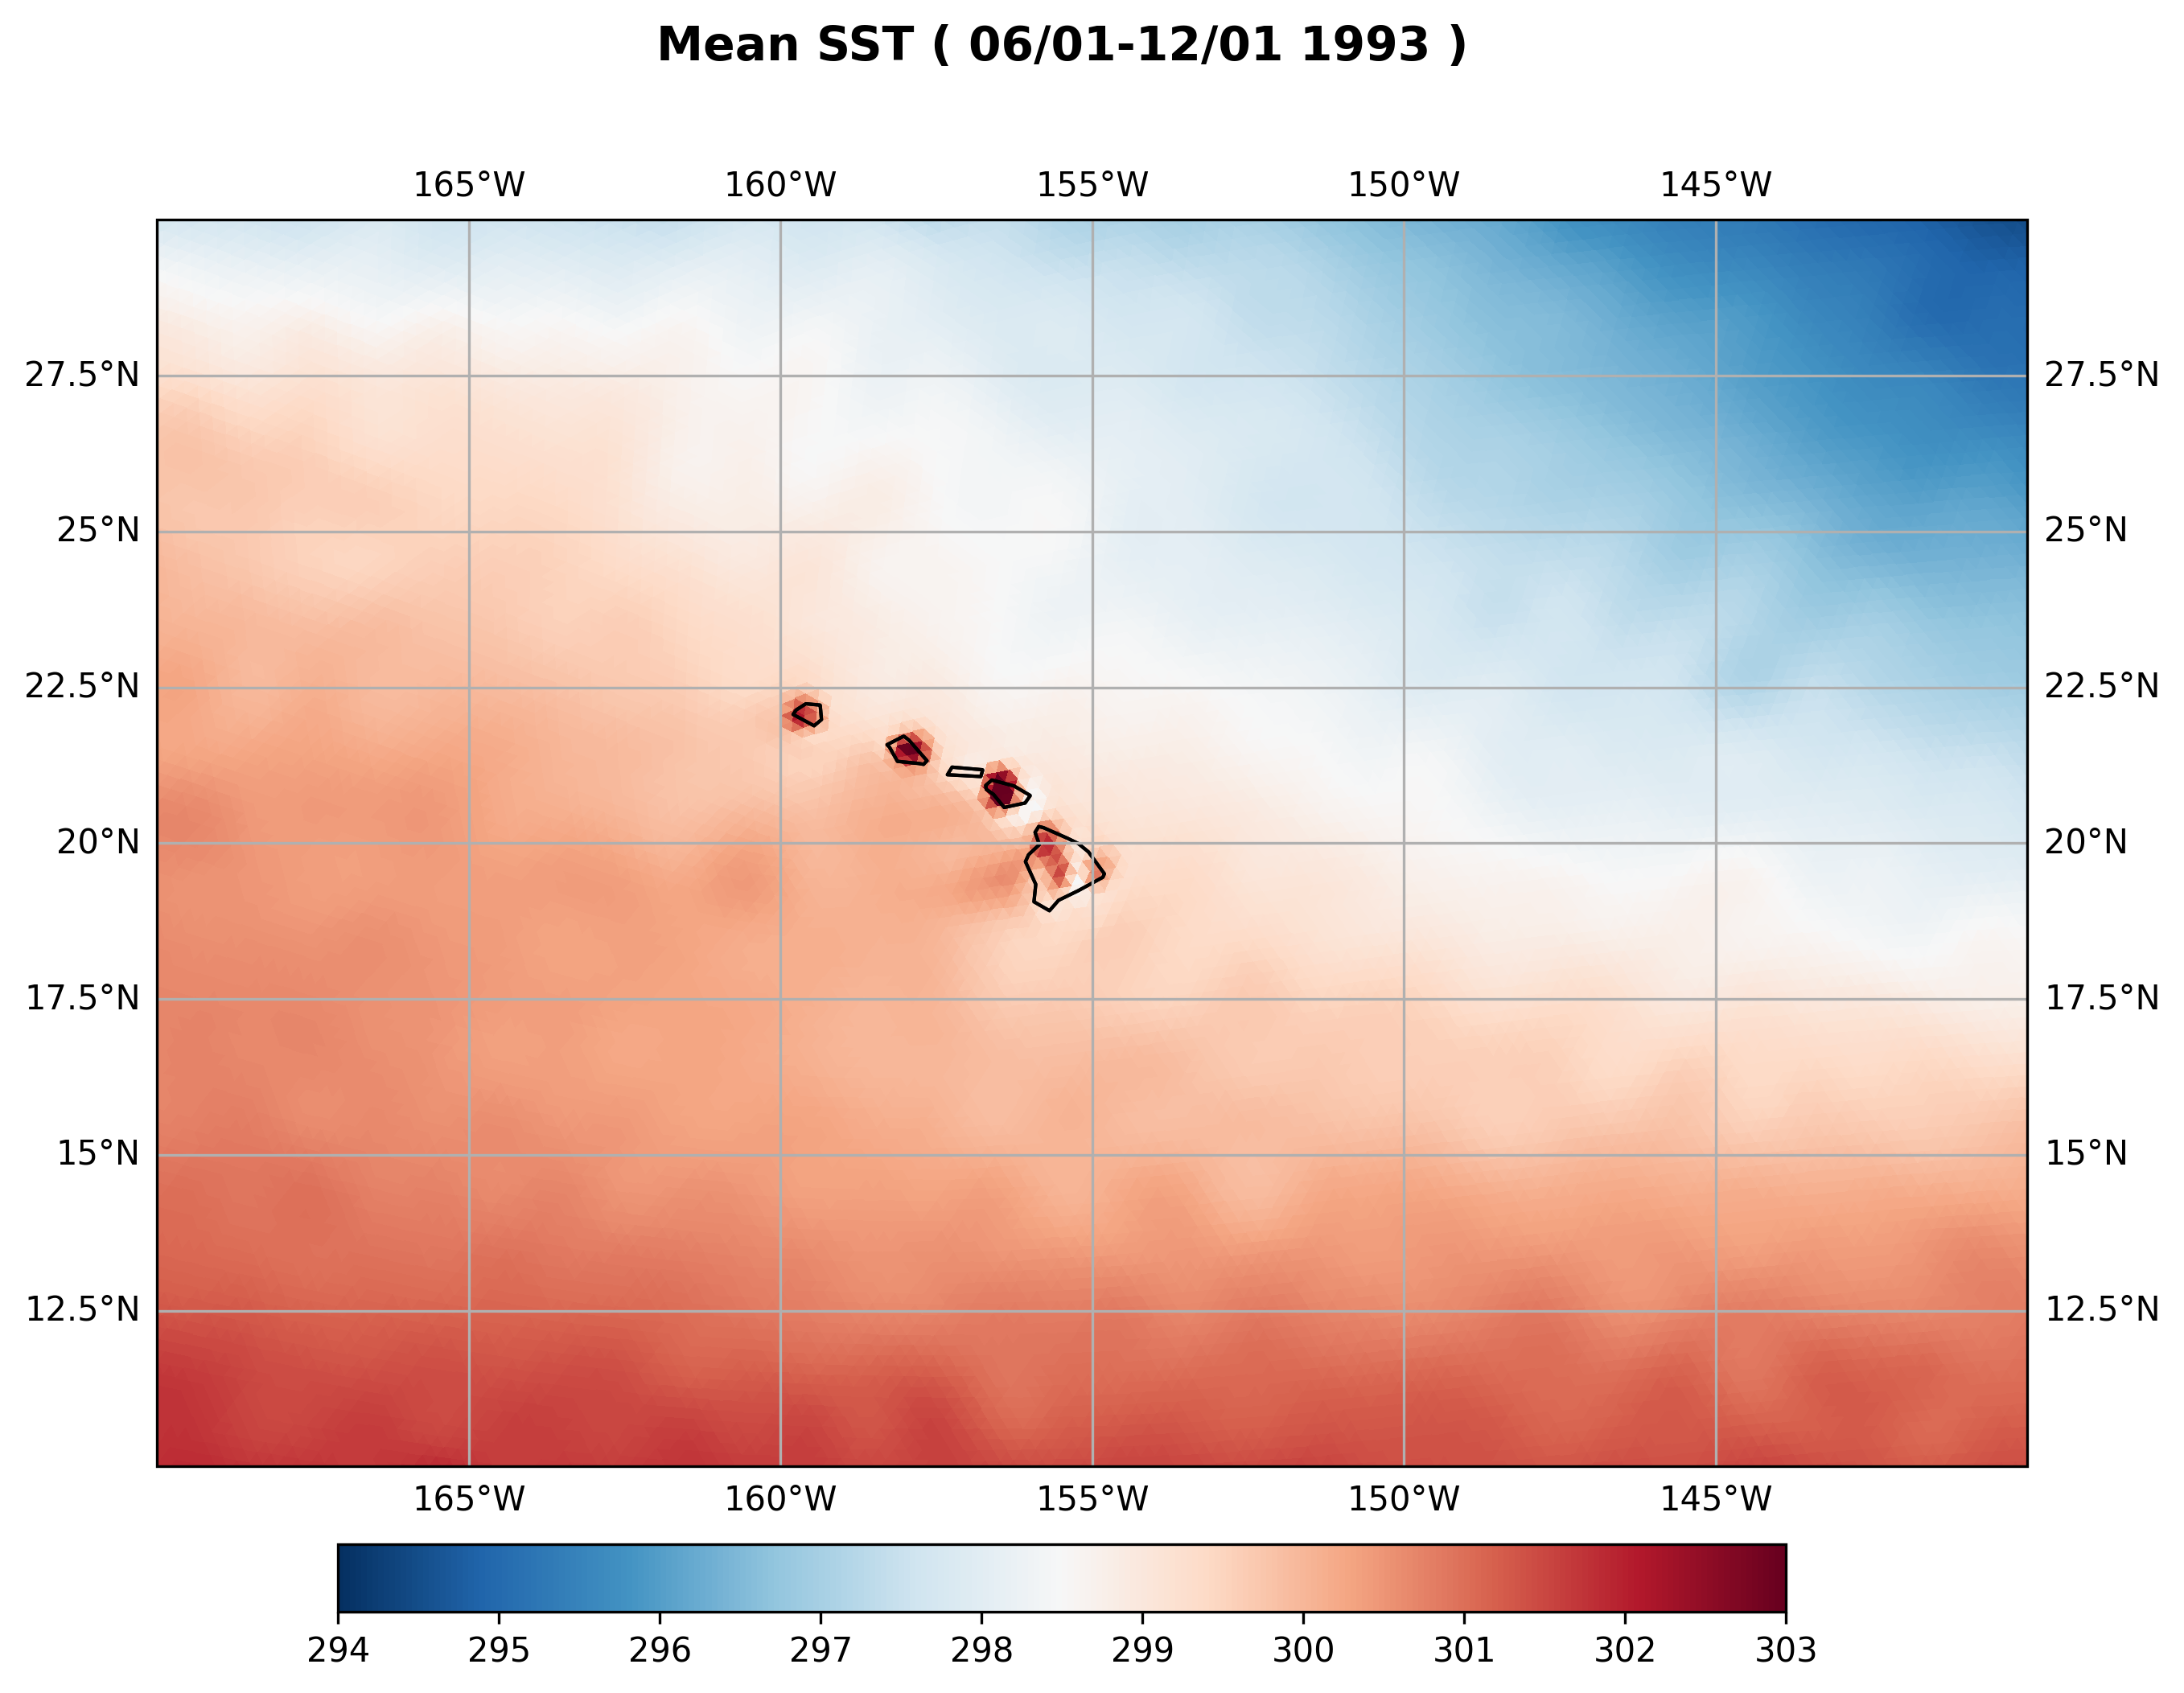

In [5]:
fig, ax = plt.subplots(figsize=(10, 7), subplot_kw={'projection': ccrs.PlateCarree()}, dpi=300)

ax.set_extent([-170, -140, 10, 30], crs=ccrs.PlateCarree())

# adding geographic or other background images in visualizations.
ax.stock_img()

scale = '110m' # '50m' # '10m'

ax.add_feature(cfeature.LAND.with_scale(scale))
ax.add_feature(cfeature.OCEAN.with_scale(scale))
ax.add_feature(cfeature.STATES.with_scale(scale))
ax.add_feature(cfeature.LAKES.with_scale(scale), alpha=0.5)
ax.add_feature(cfeature.COASTLINE.with_scale(scale))

mm = ax.tripcolor(triang, sst, edgecolors='none', 
                  transform=ccrs.PlateCarree(),
                  vmin = 294, vmax = 303,
                  cmap = 'RdBu_r')
 
# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.04, 0.6, 0.04])

# Draw the colorbar
cbar=fig.colorbar(mm, cax=cbar_ax,orientation='horizontal')

# Add gridlines with latitude and longitude labels
ax.gridlines(draw_labels=True)

plt.suptitle('Mean SST ( 06/01-12/01 1993 )', fontweight="bold", fontsize=14); 
 